# KNN classifier 
### Data set: breast-cancer-wisconsin

In [15]:
'''Local library'''
import sys
sys.path.insert(0, '../../regression/src/')
# import regression_functions_utils as rfu

In [16]:
import pandas as pd
import numpy as np

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [5]:
# Importing the dataset
data_file = '../../data/bcw/bcw_diag_clean.csv'
dataset = pd.read_csv(data_file)
X = dataset.iloc[:,1:10].values
y = dataset.iloc[:, 10].values

In [6]:
print(X)
print(y)

[[ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 [ 6  8  8 ...  3  7  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]
[0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 

### Data Exploration

#### Class Inbalance
Frequently, dependent variables show an inbalance of positive vs negative cases. 

In the current, case the inbalance is not that extreme,
- 65% of cases are $\color{blue}{negative, benigng, class Zero}$
- 35\% are $\color{orange}{positive, malignant, class One}$

0    443
1    239
Name: class, dtype: int64


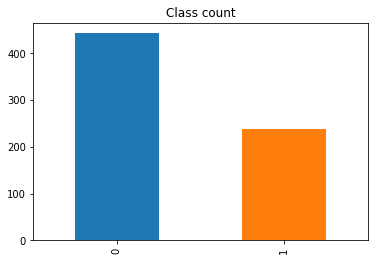

In [55]:
cc = dataset['class'].value_counts()
print(cc)
cc.plot('bar', title='Class count')

0    0.64956
1    0.35044
Name: class, dtype: float64


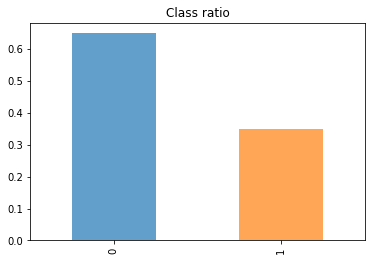

In [53]:
cr = dataset['class'].value_counts(normalize=True)
print(cr)
cr.plot('bar', title='Class ratio', alpha=.7)

#### Summarizing by class

Let's group by class, and check the average values of the independent variables

Luckly, the exploration will show a clear distinction of independent variable's values between the two classes

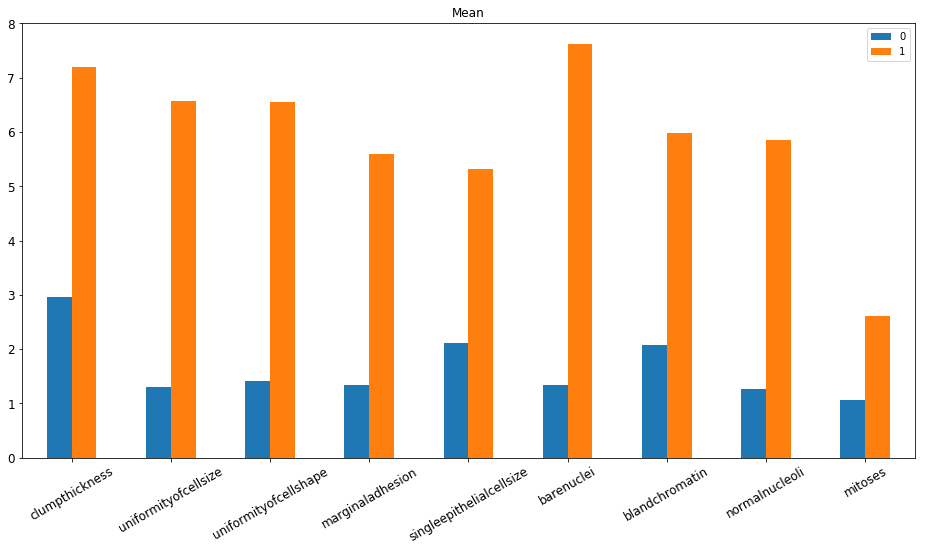

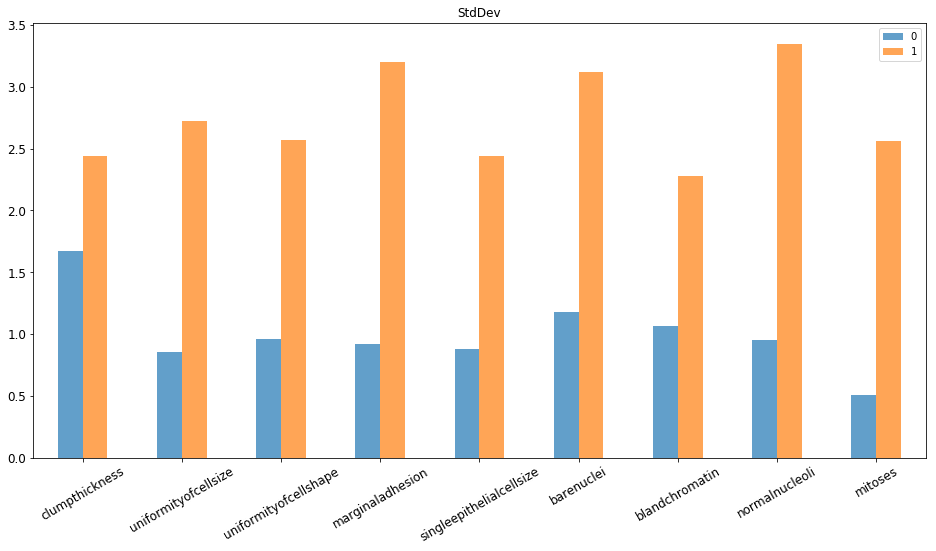

In [14]:
gbc_mean = dataset.iloc[:,1:].groupby('class').mean().reset_index()
gbc_std  = dataset.iloc[:,1:].groupby('class').std().reset_index()

gbc_mean.iloc[:,1:].transpose().plot.bar(figsize=(16,8), fontsize=12, rot=30, title='Mean')
gbc_std.iloc[:,1:].transpose().plot.bar(figsize=(16,8), fontsize=12, rot=30, title='StdDev', alpha=.7)

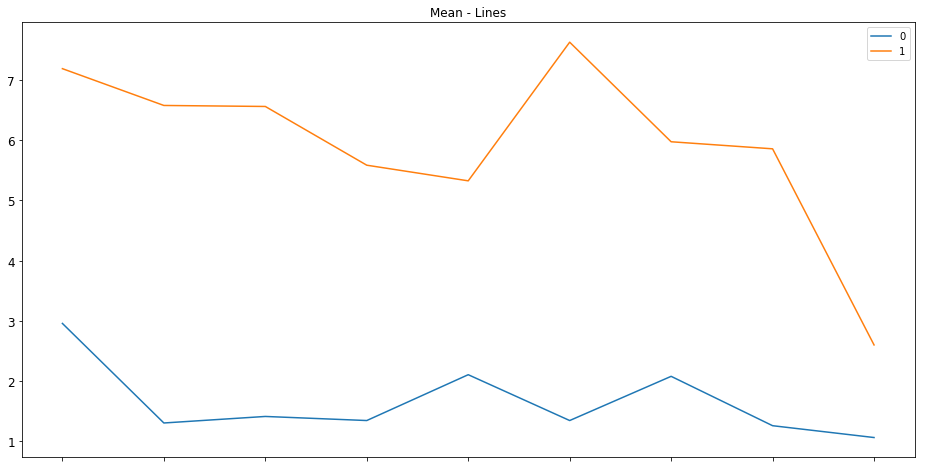

In [37]:
gbc_mean.iloc[:,1:].transpose().plot.line(figsize=(16,8), fontsize=12, rot=30, title='Mean - Lines')

In [42]:
# import seaborn as snsc
# # https://stackoverflow.com/questions/49325050/seaborn-boxplot-and-log-axis
# # https://stackoverflow.com/questions/44975337/side-by-side-boxplots-with-pandas
# import seaborn as snsc


# df_melt = dataset.melt(id_vars = 'class',
#                           value_vars = c,
#                           var_name = 'columns')

# fig, ax= plt.subplots(figsize=(18, 6))
# ax.set_xlabel('Measures', fontsize=16) 
# ax.set_ylabel('Size', fontsize=16)
# ax.set_yscale('log')
# plt.xticks(rotation=45, fontsize=16)
# plt.yticks(fontsize=16)

# b = sns.boxplot(data = df_melt,
#                 hue = 'class', # different colors for different 'cls'
#                 x = 'columns',
#                 y = 'value',
#                 order = c
#                )

# plt.title('Boxplot grouped by class') # You can change the title here
# plt.tight_layout()

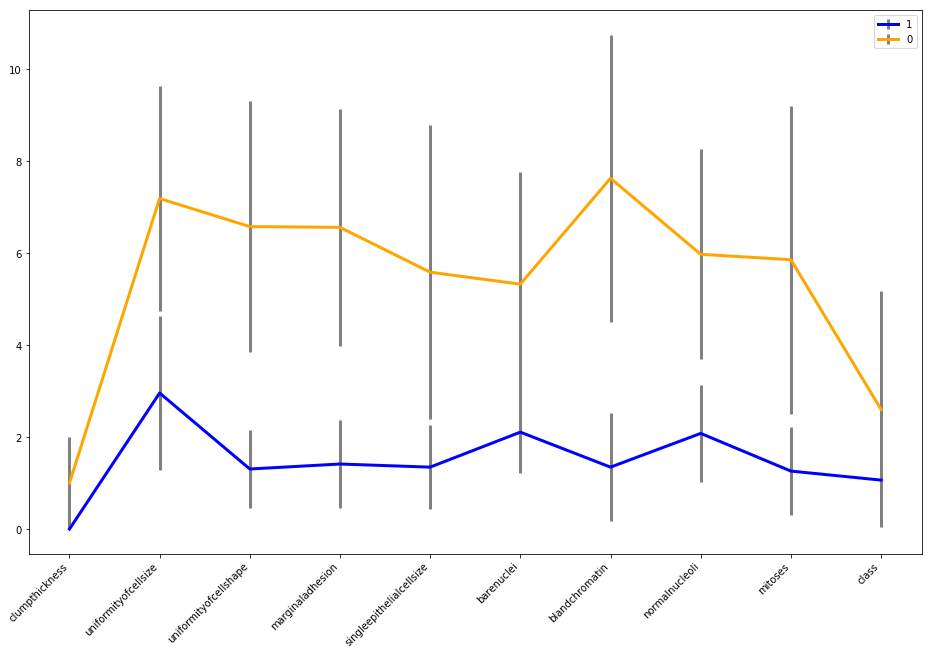

In [23]:
import matplotlib.pyplot as plt
d = dataset.iloc[:,1:]
l = d.columns
m = d.groupby('class').mean().reset_index()
s = d.groupby('class').std().reset_index()

fig = plt.figure(figsize=(16,10))
plt.errorbar(l, m.values[0], yerr=s.values[0], ecolor='gray', color='blue', label='1', lw=3)
plt.errorbar(l, m.values[1], yerr=s.values[1], ecolor='gray', color='orange', label='0', lw=3)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

### Model with full data

In [49]:
X_train = X 
y_train = y

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Fitting KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_train)

# Making the Confusion Matrix
cm = confusion_matrix(y_train, y_pred)

print(cm)



[[433  10]
 [  8 231]]


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Model with train and test sets

In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

print('Train set size: ', len(y_train))
print('Test  set size: ', len(y_test))

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

# Fitting KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Computing Confusion Matrix
print('\nconfusion_matrix\n', confusion_matrix(y_test, y_pred))

# Computing Accuracy Score
print('\naccuracy_score\n', accuracy_score(y_test, y_pred))

# Computing Classification Report
print('\nclassification_report\n', classification_report(y_test, y_pred))

Train set size:  511
Test  set size:  171

confusion_matrix
 [[108   4]
 [  7  52]]

accuracy_score
 0.935672514619883

classification_report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       112
           1       0.93      0.88      0.90        59

   micro avg       0.94      0.94      0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
